# ARIMA (Autoregressive Integrated Moving Averages)

##### The general process for ARIMA models is the following:
    1. Visualize the Time Series Data
    2. Make the time series data stationary
    3. Plot the Correlation and AutoCorrelation Charts
    4. Construct the ARIMA Model or Seasonal ARIMA based on the data
    5. Use the model to make predictions

##### Formula of Auto Regressive Model:
    yt = c + ϕ1 yt−1 + ϕ2 yt−2 + .............. + ϕp yt−p + εt
    Here,
    p = 1, 2, 3, ......
    t-1, t-2, ..... = lags
    
<br/>
<br/>

## Load the dataset and Reconnaissance
dataset used here: Perrin Freres monthly champagne sales

In [14]:
import pandas as pd
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/Perrin Freres monthly champagne sales millions.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


<br/>

### Checking if there is any missing values in the dataset
We got one missing value in the 'Month' column and two in the rest.

In [16]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

### Removing the rows containing missing values

In [17]:
df.drop([105,106], axis = 0, inplace = True)

In [18]:
df.isnull().sum()

Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

<br/>

### Changing the name of the 2nd column
We shouldn't break our teeth pronouncing any column name.

In [19]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


<br/>

### Shape of the dataset

In [20]:
df.shape

(105, 2)

<br/>

### Data types of the variables

In [21]:
df.dtypes

Month     object
Sales    float64
dtype: object

<br/>

### Change the data type of the month column

In [22]:
df['Month'] = pd.to_datetime(df['Month'])

In [23]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

#### After changing the data type, it will be looking like this

In [24]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


<br/>

### Convert the month column into index

In [25]:
df.set_index('Month', inplace = True)

In [26]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<br/>

## PLot the dataset

<AxesSubplot:xlabel='Month'>

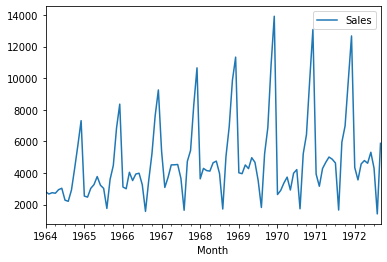

In [27]:
df.plot()

#### Note:
From the plot, we are seeing that it's kind of a seasional data. It may not be stationary. To clarify the confusion, we can apply here the 'Dickey Fuller Test' to see whether it is stationary or not.

<br/>

## Dickey Fuller Test

In [28]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(df['Sales'])

ADF test statistics : -1.8335930563276197
P-value : 0.3639157716602465
#Lags used : 11
Number of observation used : 93
Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. 


#### Note:
As the P-value is grater than 0.005, the Dickey Fuller Test tells us that the data is not stationary.  
Now it's time to make the data stationary

<br/>

## Making the data stationary by Differencing (Integrated)

As the data is seasional and each year consists 12 month, from the graph we are seeing that the per cycle difference of the data is 12 months.  
That's why we will shift 12 here and the substraction from the 'Sales' column will be stored in a new column titled 'seasonal_first_difference'.

In [32]:
df['seasional_first_difference'] = df['Sales'] - df['Sales'].shift(12)
df

,Sales,seasonal_first_difference,seasional_first_difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
...,...,...,...
1972-05-01,4618.0,-392.0,-392.0
1972-06-01,5312.0,438.0,438.0
1972-07-01,4298.0,-335.0,-335.0


<br>

## Again applying Dickey Fuller Test
Now, we want to see if our new data became stationary or not.  
But this time we should pay extra attention to 'dropna()'. Because for shifting 12, the 1st 12 values of the 'Sales_first_difference' will be NaN. We have to keep them aside.

In [33]:
adfuller_test(df['seasional_first_difference'].dropna())

ADF test statistics : -7.626619157213166
P-value : 2.0605796968136632e-11
#Lags used : 0
Number of observation used : 92
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


#### Note:
Done! As our P-value this time becomes less than 0.005, we can easily tell this data a stationary one.

<br/>

## Plotting our new stational data

<AxesSubplot:xlabel='Month'>

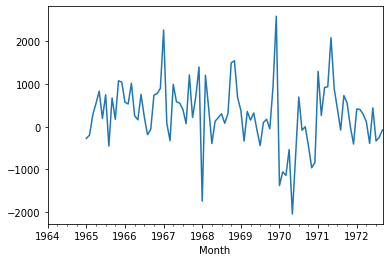

In [35]:
df['seasional_first_difference'].plot()

<br/>

## Plotting ACF and PACF
ACF = Auto correlation function  
PACF= Partial Auto correlation function
<br/>

ACF and PACF are used to find the best lag value for the model. 
##### PACF is most suitable for AR model.  
##### And ACF is most suitable for MA model.
<br/>

shuts off - The abrupt decrease in PACF. It normally happens in PACF only. And in ACF the decrease is exponential.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

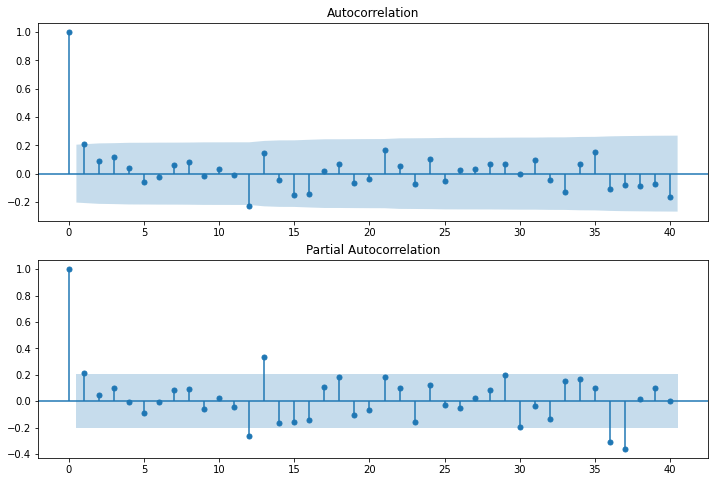

In [40]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasional_first_difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasional_first_difference'].iloc[13:],lags=40,ax=ax2)

#### ARIMA Model takes 3 values.

###### p - AR model lag   : find out from the PACF, where shuts off happens.  
###### d - Differencing    : how many times the shifting are done?
###### q - MA model lag : find out from ACF, where exponential decrease happens.  
<br/>

In our case,  
p = 1 (As abrupt decrease happens in 1)  
d = 1  
q = 0 (As we can't see any exponential decrease in ACF. The decrease in ACF is also abrupt. but in this case, we can also consider an exponential decrease in 1. Then q value can also be 1.)

<br/>

# ARIMA model
#### Note : ARIMA should be selected when the data is seasional. Though we have seasional data here, we are implementing ARIMA to see the process.

In [42]:
from statsmodels.tsa.arima_model import ARIMA

model_arima = ARIMA(df['Sales'], order = (1,1,1))     #order = (p, d, q)
model_arima_fit = model_arima.fit()

c:\users\mehedi hassan galib\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\mehedi hassan galib\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Model summary

In [43]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 27 Aug 2020   AIC                           1910.251
Time:                        00:55:41   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7859     12.405      1.837      0.066      -1.528      47.100
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<br/>

## Plotting the model

<AxesSubplot:xlabel='Month'>

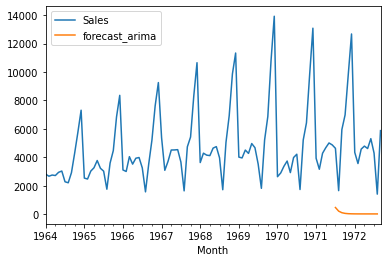

In [45]:
df['forecast_arima']=model_arima_fit.predict(start=90, end=103, dynamic=True)
df[['Sales','forecast_arima']].plot()

##### As the data isn't seasional, ARIMA model doesn't perform well

<br/>

# SARIMAX model

In [52]:
model_sarimax = sm.tsa.statespace.SARIMAX(df['Sales'],
                                          order = (1,1,1),                  # order = (p, d, q)
                                          seasonal_order = (1,1,1, 12))     # seasonal_order = (p, d, q, shift)  
model_sarimax_fit = model_sarimax.fit()

c:\users\mehedi hassan galib\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\mehedi hassan galib\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<br/>

## Plotting the model

<AxesSubplot:xlabel='Month'>

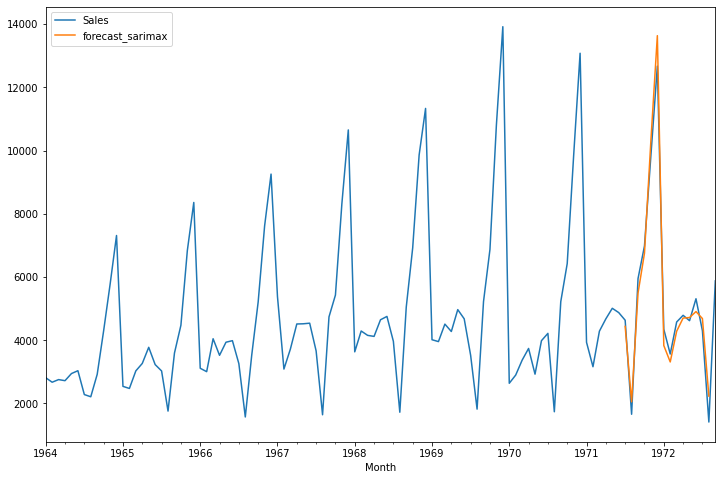

In [54]:
df['forecast_sarimax']=model_sarimax_fit.predict(start=90, end=103, dynamic=True)      # 90 and 103 are the index range to be predicted
df[['Sales','forecast_sarimax']].plot(figsize = (12, 8))

<br/>
<br/>

### Creating a additional dataset for forecasting

In [60]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset (months = x) for x in range(0, 24)]

In [62]:
future_date_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)
future_date_dataset.tail()

,Sales,seasonal_first_difference,seasional_first_difference,forecast_arima,forecast_sarimax
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


### Now concate as well as merge the new dataset with the existing one

In [63]:
merged_df = pd.concat([df, future_date_dataset])
merged_df.tail()

,Sales,seasonal_first_difference,seasional_first_difference,forecast_arima,forecast_sarimax
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [65]:
df.tail()

,Sales,seasonal_first_difference,seasional_first_difference,forecast_arima,forecast_sarimax
Month,,,,,
1972-05-01,4618.0,-392.0,-392.0,22.893490,4717.510940
1972-06-01,5312.0,438.0,438.0,22.832616,4906.404025
1972-07-01,4298.0,-335.0,-335.0,22.806175,4685.436516
1972-08-01,1413.0,-246.0,-246.0,22.794691,2232.408528
1972-09-01,5877.0,-74.0,-74.0,NaN,NaN


<AxesSubplot:>

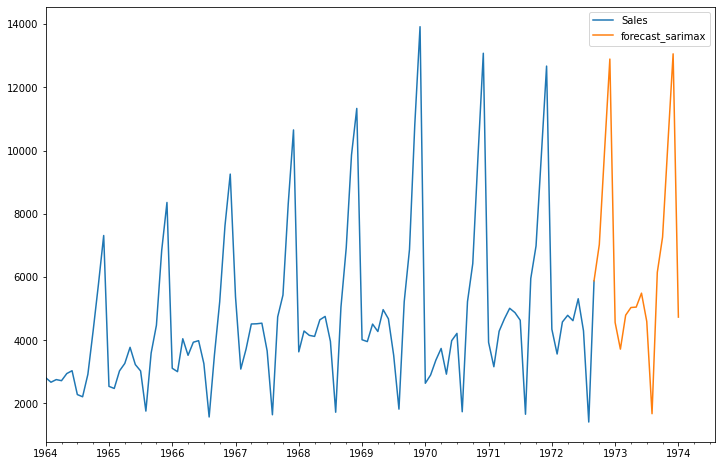

In [67]:
merged_df['forecast_sarimax'] = model_sarimax_fit.predict(start =104, end = 120, dynamic= True )
merged_df[['Sales', 'forecast_sarimax']].plot(figsize = (12, 8))